In [51]:
import numpy as np
import xarray as xr
import pandas as pd
import re

import seaborn as sns
import xskillscore as xs
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors
from scipy import stats

In [122]:
## Where are we working
proj_dir = '/Users/zstanley/Documents/git_repos/obs_loc_for_scda/'
plot_dir = proj_dir + '/plots/global_maps/opt_loc/'
my_data_dir = proj_dir + '/my_data/20151206.030000/'
nb_dir = proj_dir + '/notebooks/'

In [52]:
def get_filenum(filename):
  match_obj = re.search('(?<=opt_loc_global_Ne).*(?=\.nc)', filename)
  filenum = int(match_obj.group(0))
  return filenum

In [63]:
def preprocess(ds):
  ''' Add an ensemble size coordinate '''
  dsnew = ds.copy()
  # File name contains ensemble member index
  filename = dsnew.encoding['source']
  filenum = get_filenum(filename)
  # Add ens_size dimension
  dsnew['ens_size'] = filenum
  dsnew = dsnew.expand_dims('ens_size').set_coords('ens_size')
  return dsnew  

In [74]:
ds =  xr.open_mfdataset(my_data_dir+'/opt_loc_global_Ne*.nc', autoclose=True, preprocess=preprocess)

In [76]:
keys = list(ds.data_vars)
for ii in (0,12):
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[14]]
for ii in (1, 13):
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[15]]
for ii in (16,28):
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[30]]
for ii in (17,29):
    ds[keys[ii]+'_relative'] = 1 - ds[keys[ii]]/ds[keys[31]]

keys2 = list(ds.data_vars)
keys2 = keys2[32:]

for key in keys2:
    ds[key+'_median'] = ds[key].where(~mask).median(skipna=True, dim=['lat', 'lon'])
    
keys3 = list(ds.data_vars)
keys3 = keys3[40:]

ds = ds[keys3]

/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


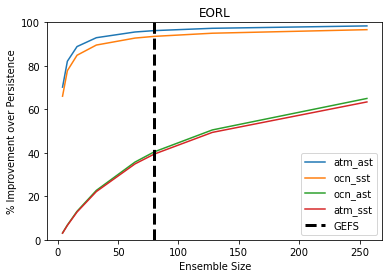

In [124]:
plt.plot(ds['ens_size'].values, 100*ds['error_eorl_atm_ast_relative_median'].values, label='atm_ast')
plt.plot(ds['ens_size'].values, 100*ds['error_eorl_ocn_sst_relative_median'].values, label='ocn_sst')
plt.plot(ds['ens_size'].values, 100*ds['error_eorl_ocn_ast_relative_median'].values, label='ocn_ast')
plt.plot(ds['ens_size'].values, 100*ds['error_eorl_atm_sst_relative_median'].values, label='atm_sst')
plt.axvline(80, color='k', linestyle='--', linewidth=3, label = 'GEFS')
plt.ylim([0, 100])
plt.title('EORL')
plt.ylabel('% Improvement over Persistence')
plt.xlabel('Ensemble Size')
plt.legend()
plt.savefig(plot_dir+'eorl_vs_enssize.png')
plt.show()

/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/Users/zstanley/.conda/envs/favorite/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


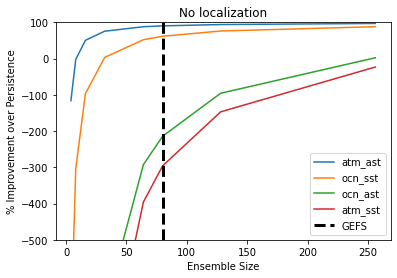

In [123]:
plt.plot(ds['ens_size'].values, 100*ds['error_unloc_atm_ast_relative_median'].values, label='atm_ast')
plt.plot(ds['ens_size'].values, 100*ds['error_unloc_ocn_sst_relative_median'].values, label='ocn_sst')
plt.plot(ds['ens_size'].values, 100*ds['error_unloc_ocn_ast_relative_median'].values, label='ocn_ast')
plt.plot(ds['ens_size'].values, 100*ds['error_unloc_atm_sst_relative_median'].values, label='atm_sst')
plt.axvline(80, color='k', linestyle='--', linewidth=3, label = 'GEFS')
plt.ylim([-500, 100])
plt.title('No localization')
plt.ylabel('% Improvement over Persistence')
plt.xlabel('Ensemble Size')
plt.legend()
plt.savefig(plot_dir+'unloc_vs_enssize.png')
plt.show()